In [16]:
    jupyter_settings()

# <font color ='blue'> Predições de Vendas das Lojas Rossmann </font>

# Agenda
1. Contexto
2. Desafio
3. Desenvolvimento da Solução
4. Conclusão e Demonstração
5. Próximos passos

#  <font color ='blue'> 1.Contexto </font>


- Rossmann: Loja de indústria farmacêutica
- Reunião Mensal de Resultados
- CFO pediu uma previsão de vendas das próximas 6 semanas de cada loja

# <font color ='blue'> 2. Desafio </font>


## Problema
- Definição do budget para a reforma das lojas. 

## Causas
- Predição de vendas atual apresenta muita divergencia
- p processo de predição de vendas é baseado em experiências passadas. 
- Toda a previsão de vendas é feita manualmente pelas 1.115 lojas da Rossmann
- A visualização das vendas é limitada ao computador.

## Solução
- Usar machine learning para realizar a previsão de vendas de todas as lojas
- Visualização das predições de Vendas poderão ser feitas pelo smartphone

# <font color ='blue'>  3. Desenvolvimento da Solução </font>


## Descrição dos dados

In [21]:
print('Number of Rows: {}'.format(df1.shape[0])) # 0 são linhas e 1 são colunas
print('Number of Cols: {}'.format(df1.shape[1]))


Number of Rows: 1017209
Number of Cols: 18


## Descriptive Statistical

In [33]:
m

,attibutes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.171835,0.0,0.377237,1.739838,1.027039


## Mapa Mental de Hipoteses

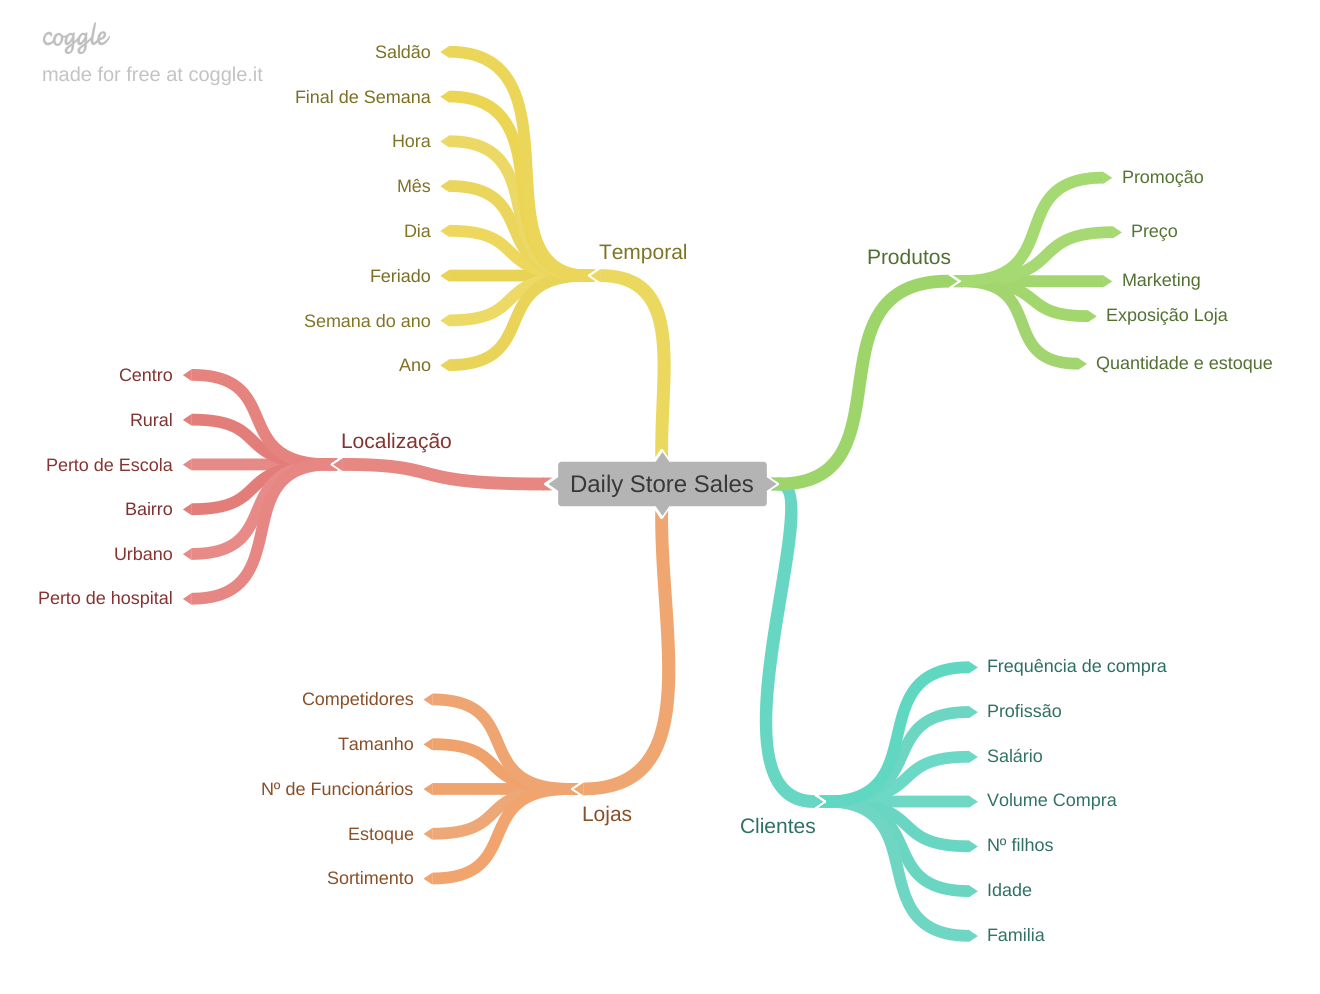

In [38]:
df2= df1.copy()
Image('img/mindmap.png')

## Hipóteses da Análise Exploratória

- Lojas com maior sortimento deveriam vender mais
- Lojas com competidores mais próximos deveriam vender menos
- Lojas com competidores há mais tempo deveriam vender mais
- Lojas com promoções mais agressivas (maior desconto) deveriam vender mais
- Lojas com mais dias de promoção deveriam vender mais
- Lojas com mais promoções consecutivas deveriam vender mais
- Lojas abertas durante feriado final do ano deveriam vender mais
- Lojas deveriam vender mais ao longo dos anos
- Lojas deveriam vender mais no segundo semestre do ano
- Lojas deveriam vender mais depois do dia 10 de cada mês
- Lojas deveriam vender menos no fds
- Lojas deveriam vender menos durante os feriados escolares

# Análise exploratória dos dados

### Response Variable


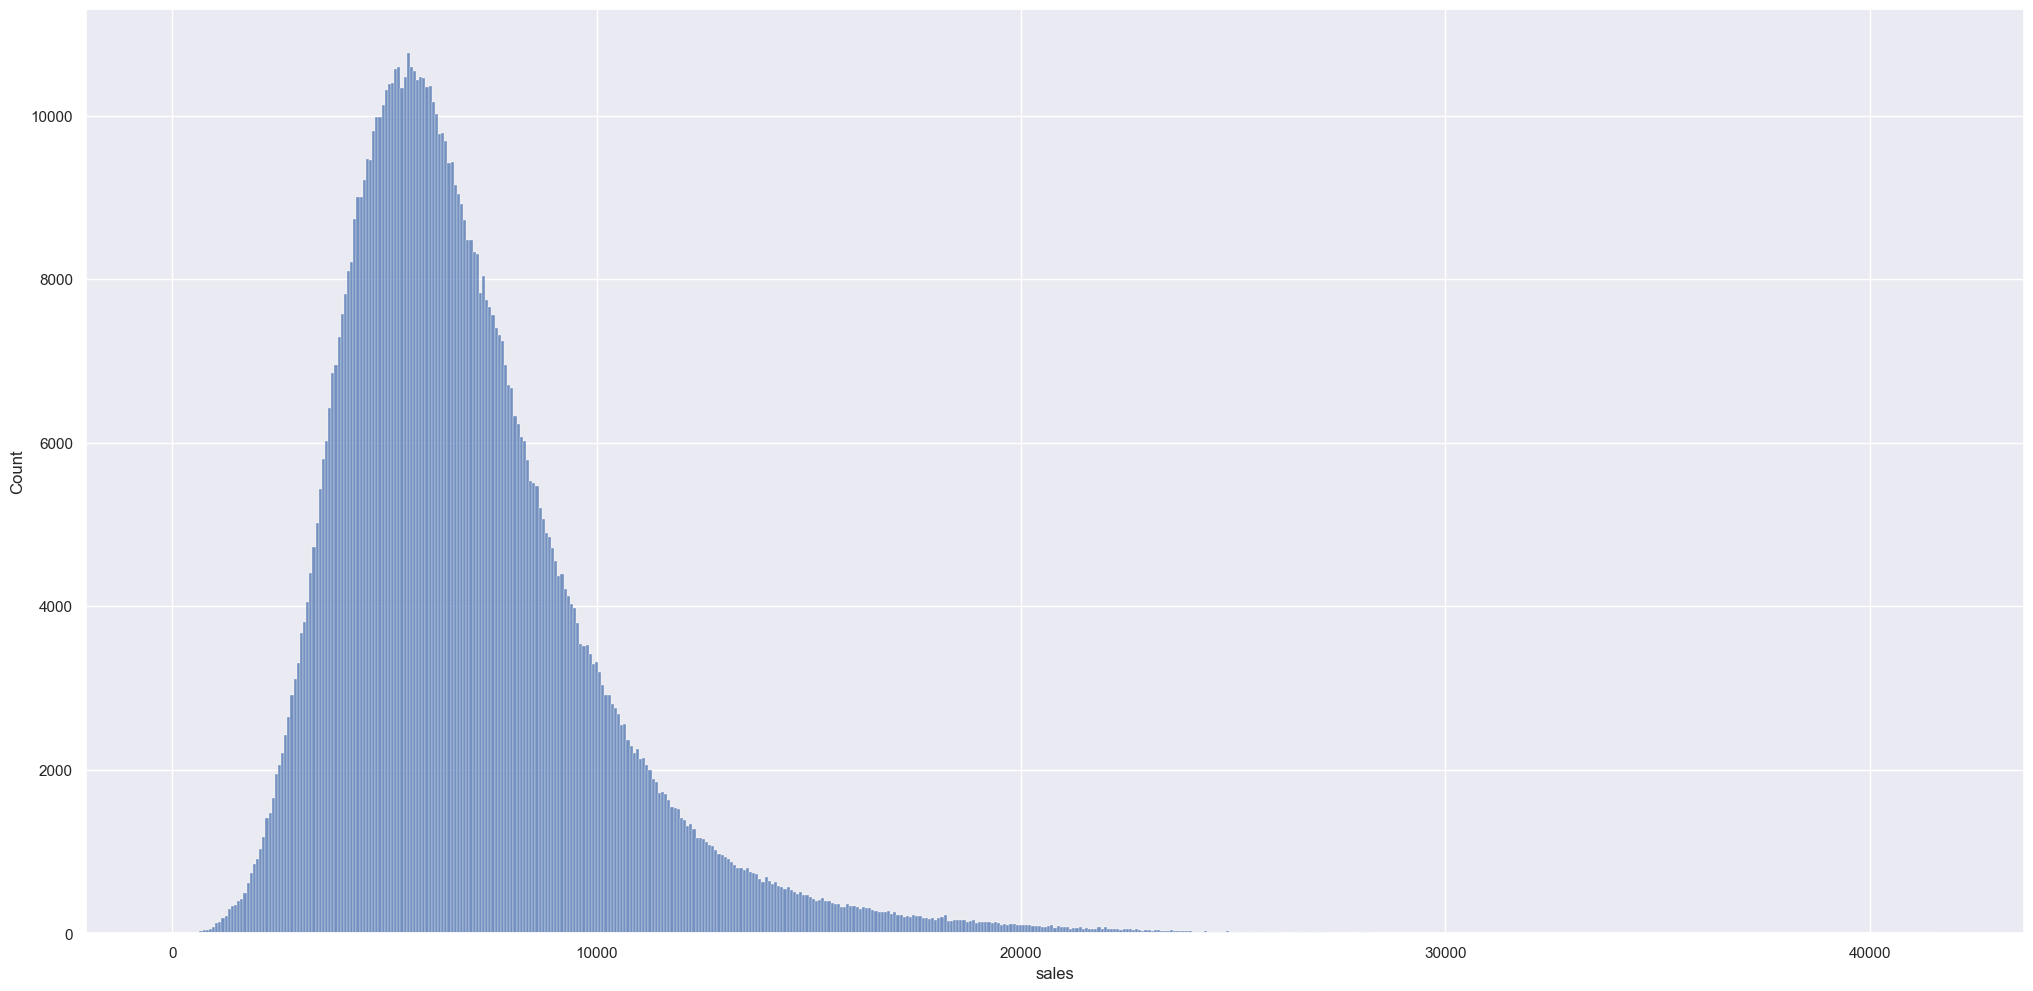

In [44]:
# Response Variable

sns.histplot( df4['sales'], kde=False);


### Nunerical Variable


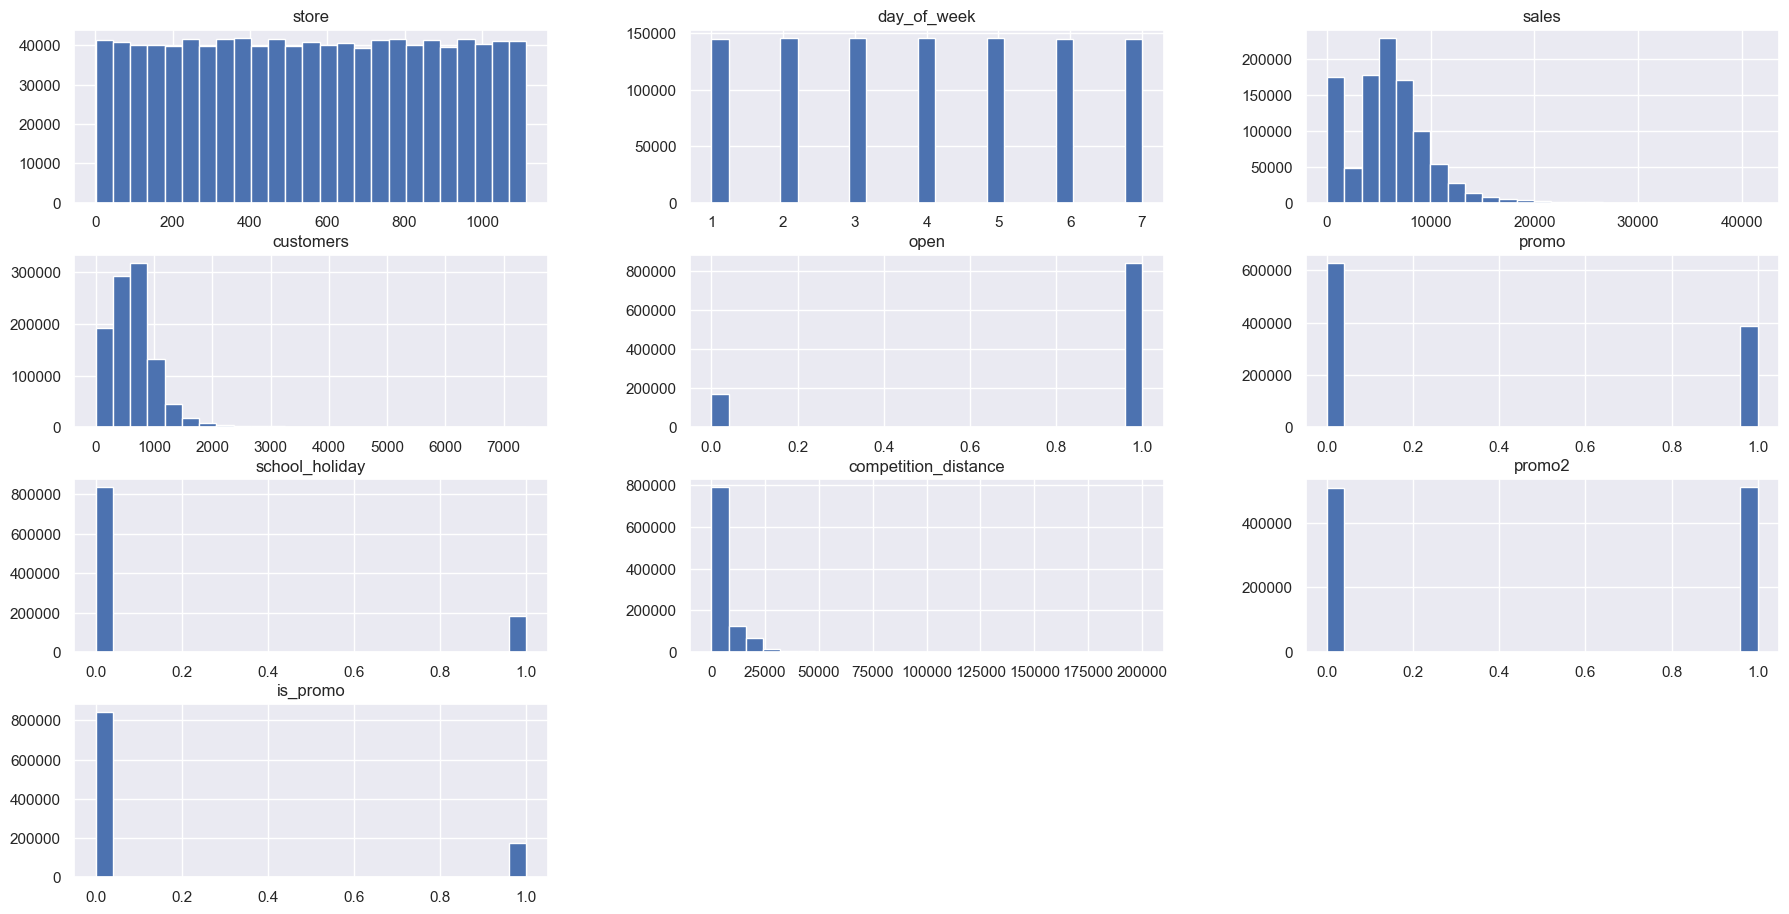

In [45]:
# Numerical Variable

num_attributes.hist( bins=25, figsize=(22,11) );
#plt.tight_layout();
# Bin é uma caixa pra colocar dados
# ; pra não aparecer os textos

### Categorical Variable

<AxesSubplot:xlabel='sales', ylabel='Density'>

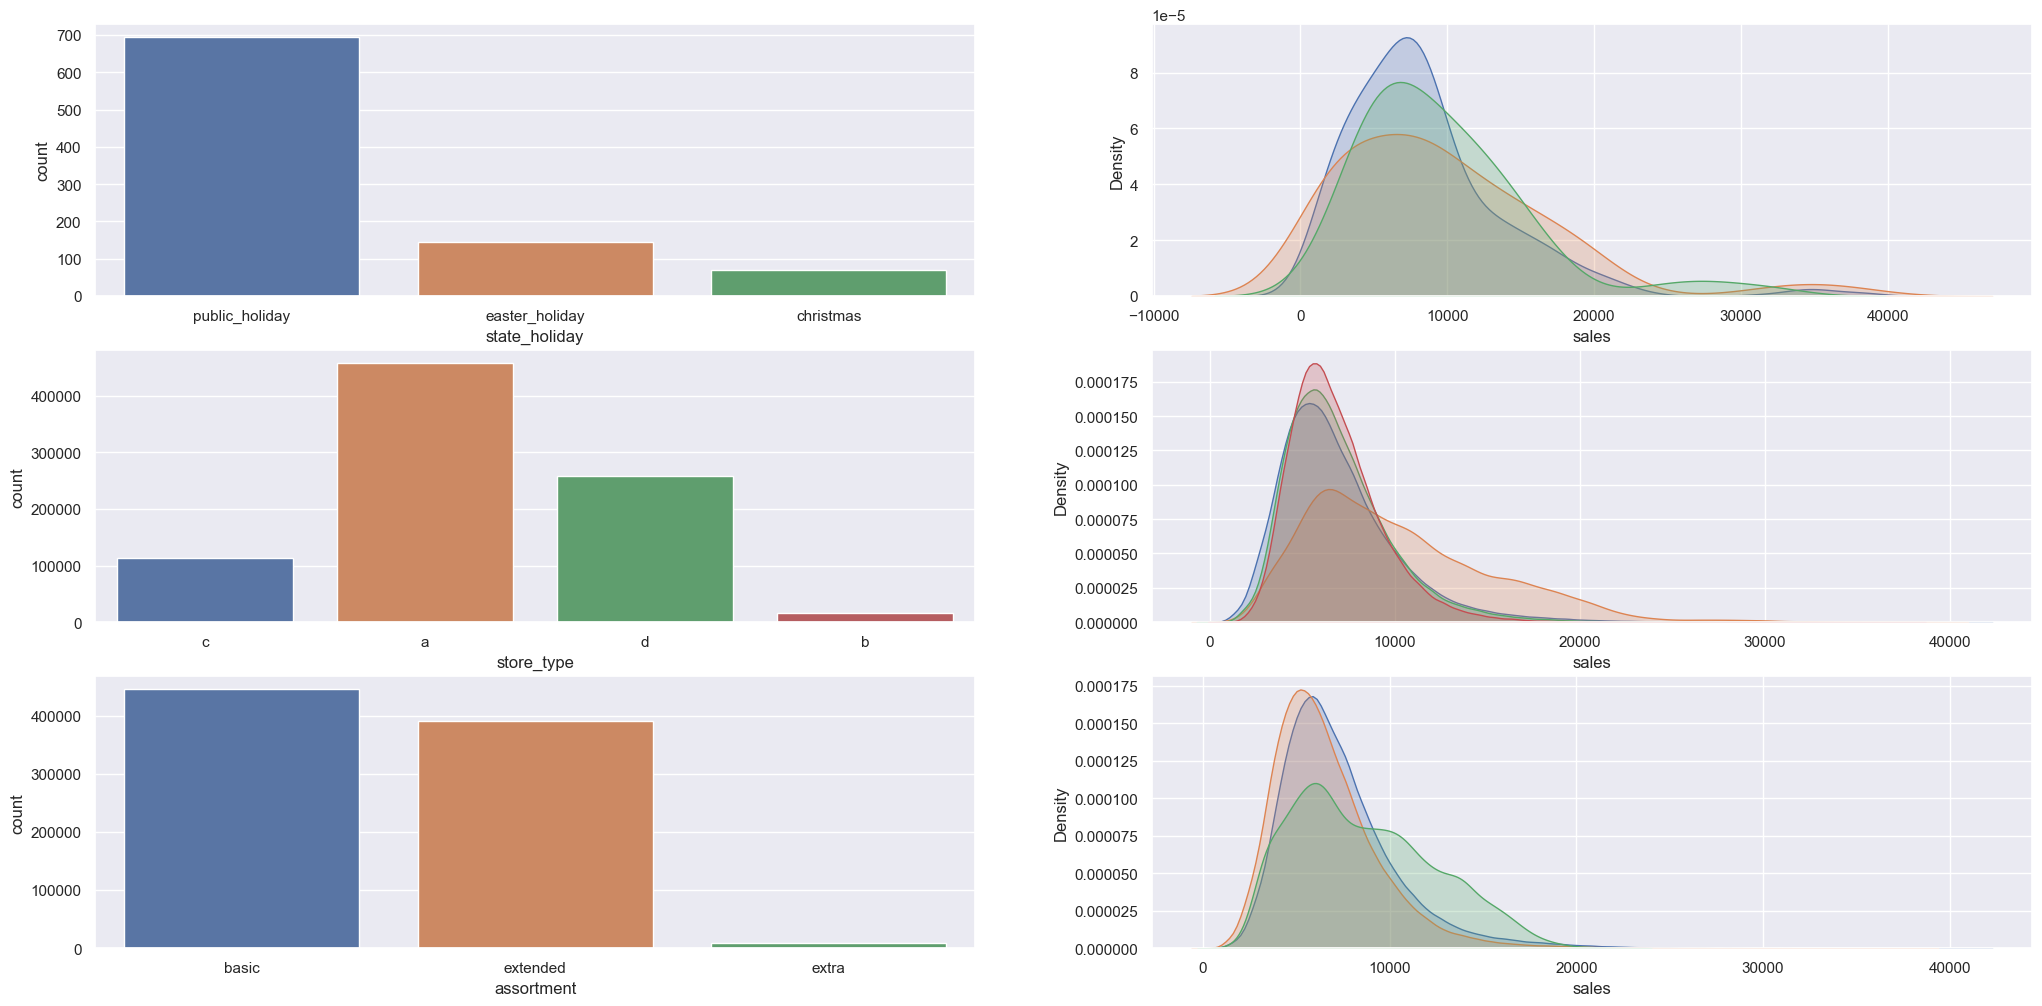

In [46]:
# state_holiday
# Ver as vendas (linhas) sem estar duplicado: df4['state_holiday'].drop_dupicates()
plt.subplot( 3, 2, 1 ) # Cria o grid pra ver vários gráficos
a = df4[df4['state_holiday'] != 'regular_day'] # Tirando o 'regular_day' pra dar pra ver os outro valores (regular day ocupa mto)
sns.countplot( x=a['state_holiday'] );

plt.subplot( 3, 2, 2 ) # Esses aqui estão na mesma linha, mas ai tem que colocar o 'shade = True'pra ficar opaco
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill=True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', fill=True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', fill=True )

# store_type
plt.subplot( 3, 2, 3 )
sns.countplot( x=df4['store_type'] );

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', fill=True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', fill=True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', fill=True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', fill=True )

# assortment
plt.subplot( 3, 2, 5 )
sns.countplot( x=df4['assortment'] )

plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label='extended', fill=True )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label='basic', fill=True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label='extra', fill=True )

### **H1.** Lojas com maior sortimentos deveriam vender mais.
 **FALSA** Lojas com MAIOR SORTIMENTO vendem MENOS.

<AxesSubplot:xlabel='year_week'>

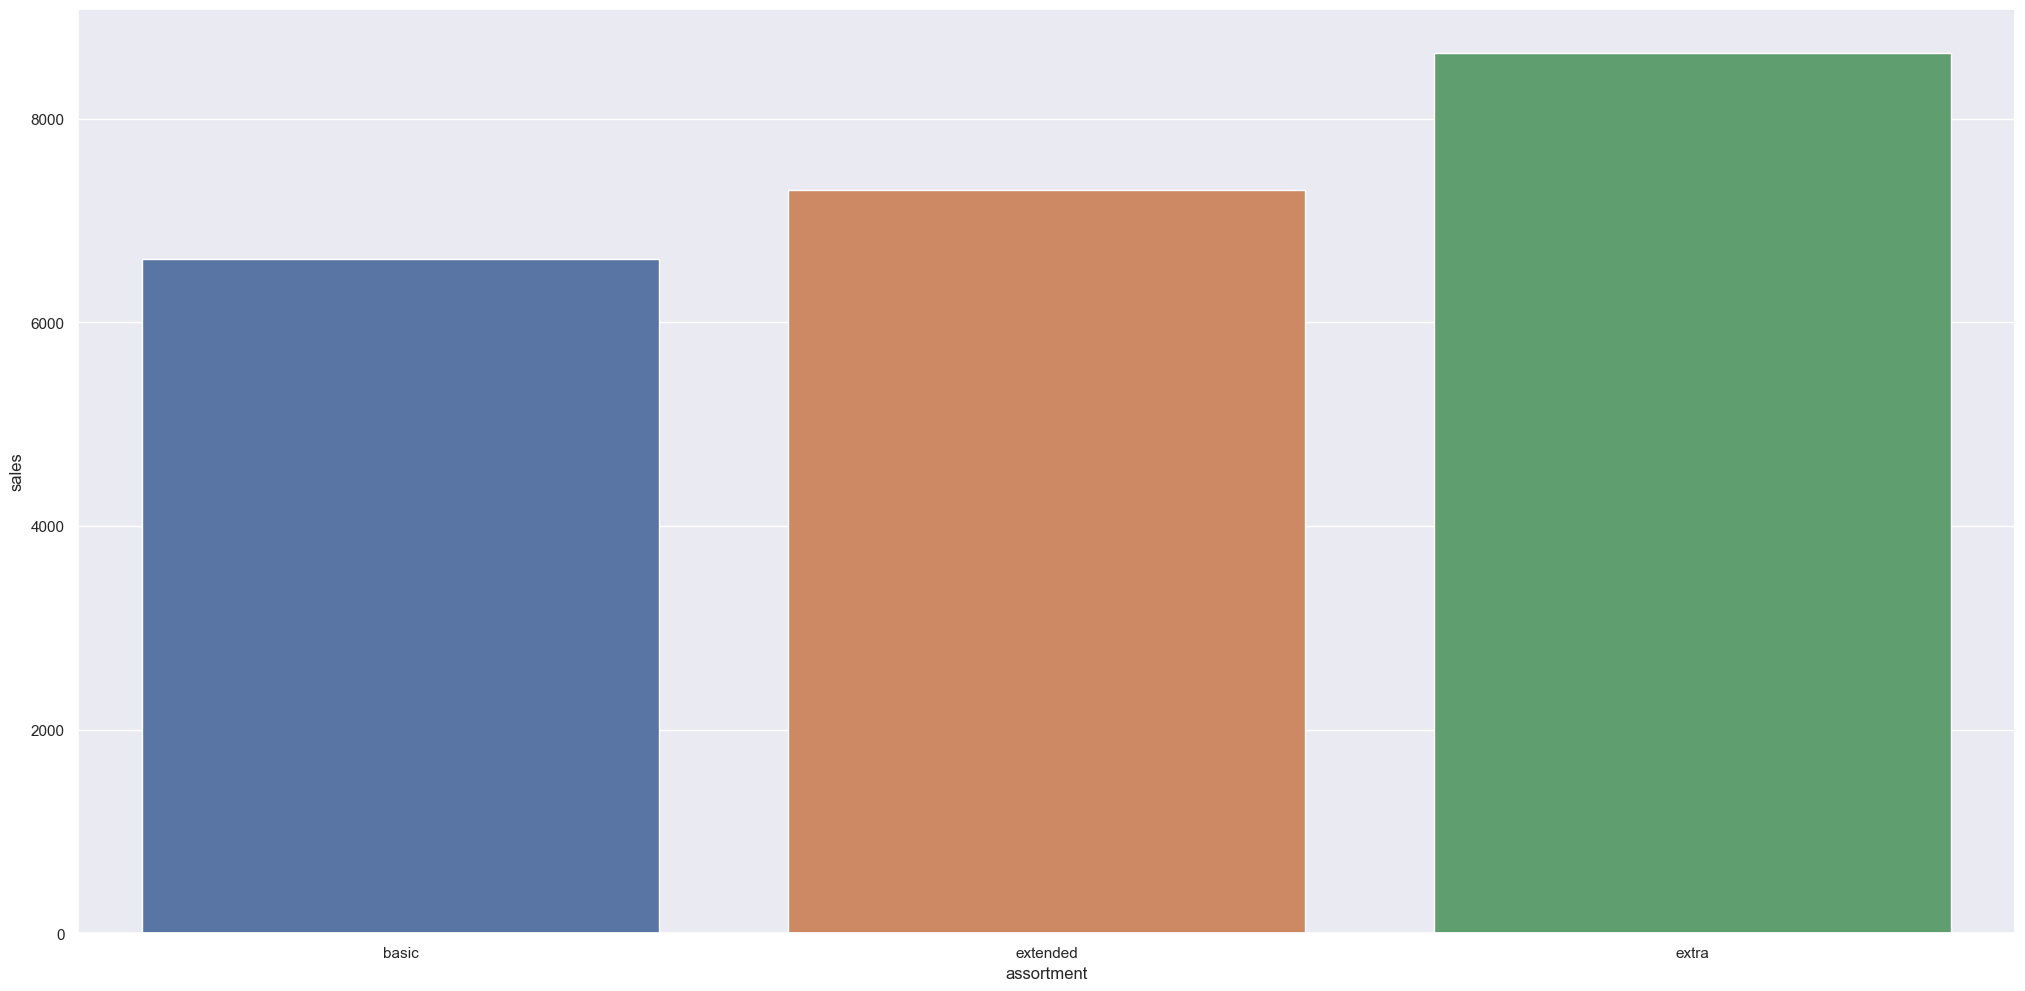

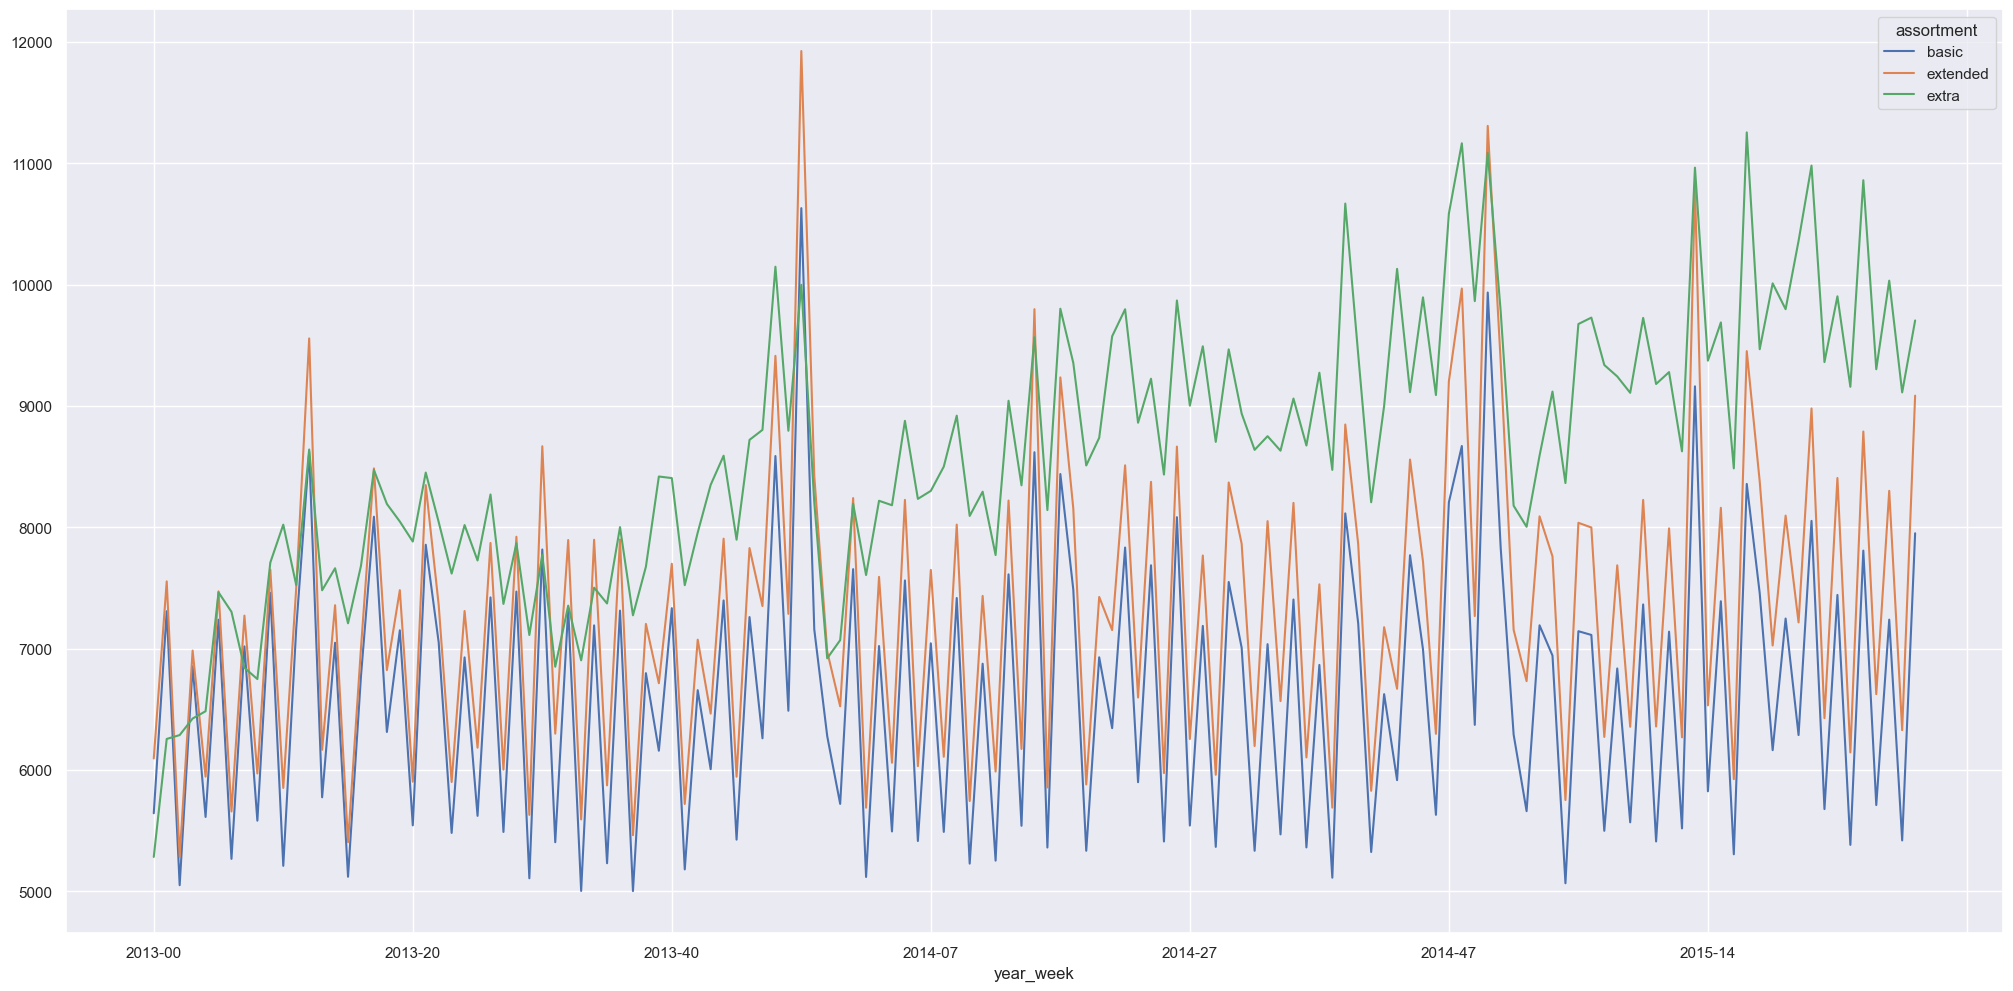

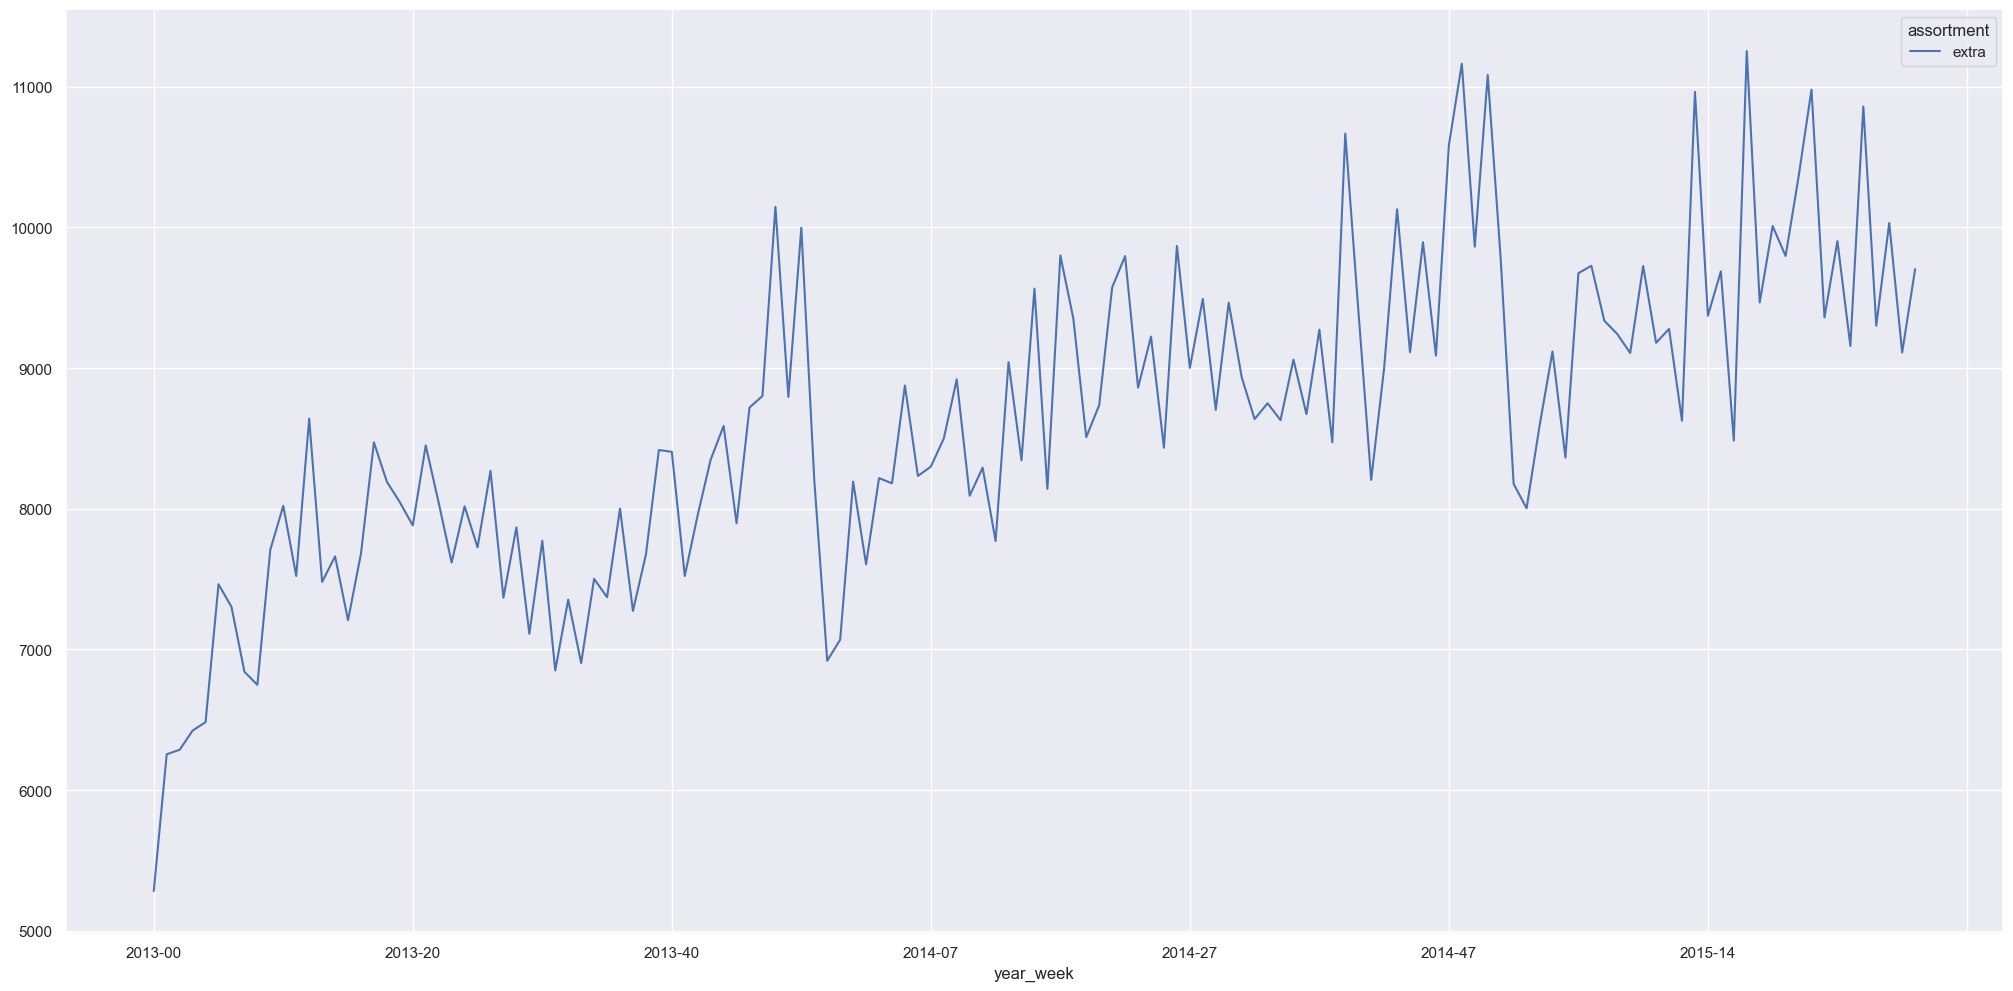

In [47]:


aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).mean().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1 );

aux2 = df4[['year_week', 'assortment', 'sales']].groupby( ['year_week','assortment'] ).mean().reset_index()
aux2.pivot( index='year_week', columns='assortment', values='sales' ).plot()

aux3 = aux2[aux2['assortment'] == 'extra']
aux3.pivot( index='year_week', columns='assortment', values='sales' ).plot()

### **H2.** Lojas com competidores mais próximos deveriam vender menos.
**FALSA** Lojas com COMPETIDORES MAIS PROXIMOS vendem MAIS.

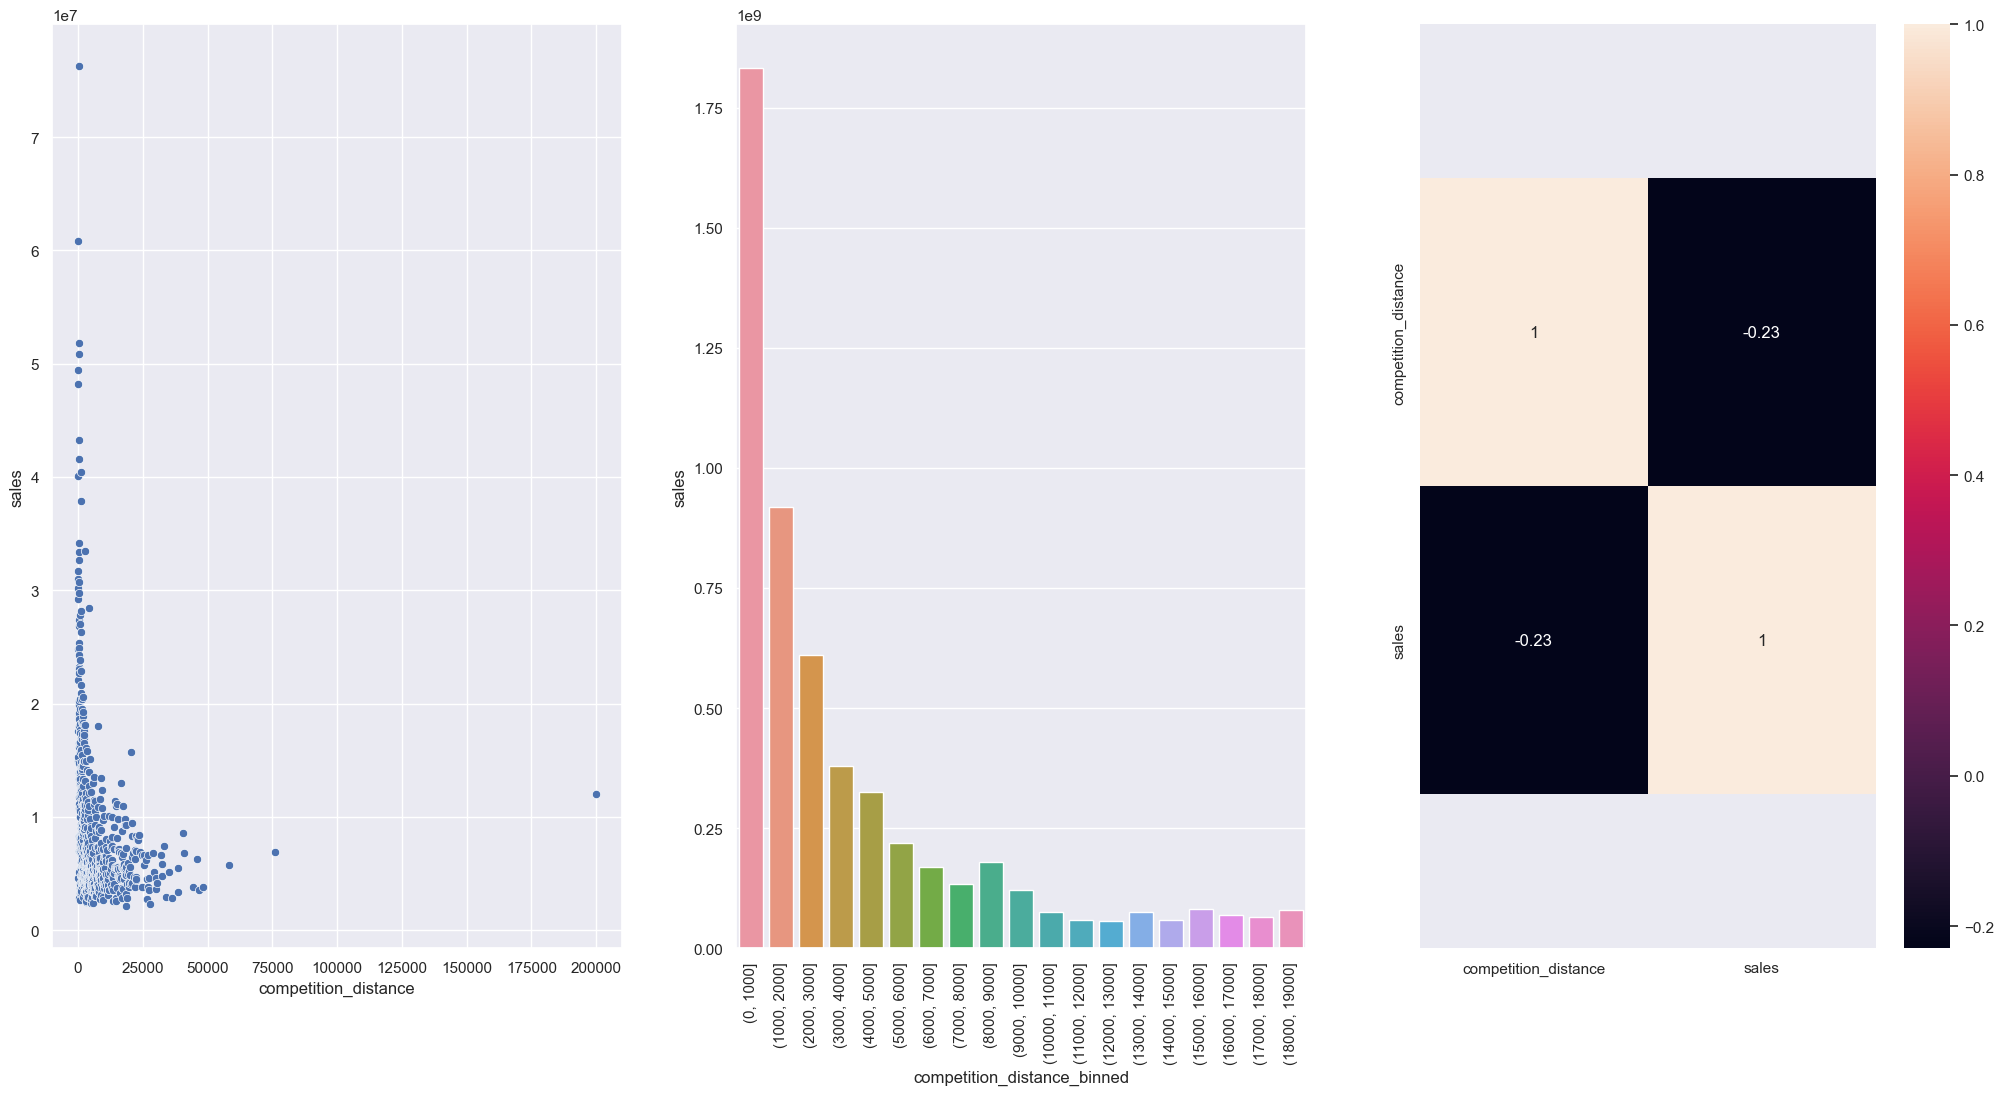

In [48]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

plt.subplot( 1, 3, 1 )
sns.scatterplot( x ='competition_distance', y='sales', data=aux1 );

plt.subplot( 1, 3, 2 )
bins = list( np.arange( 0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 3 )
x = sns.heatmap( aux1.corr( method='pearson' ), annot=True );
bottom, top = x.get_ylim()
x.set_ylim( bottom+0.5, top-0.5 );

### **H8.** Lojas abertas durante o feriado de Natal deveriam vender mais.
**FALSA** Lojas abertas durante o feriado do Natal vendem menos.

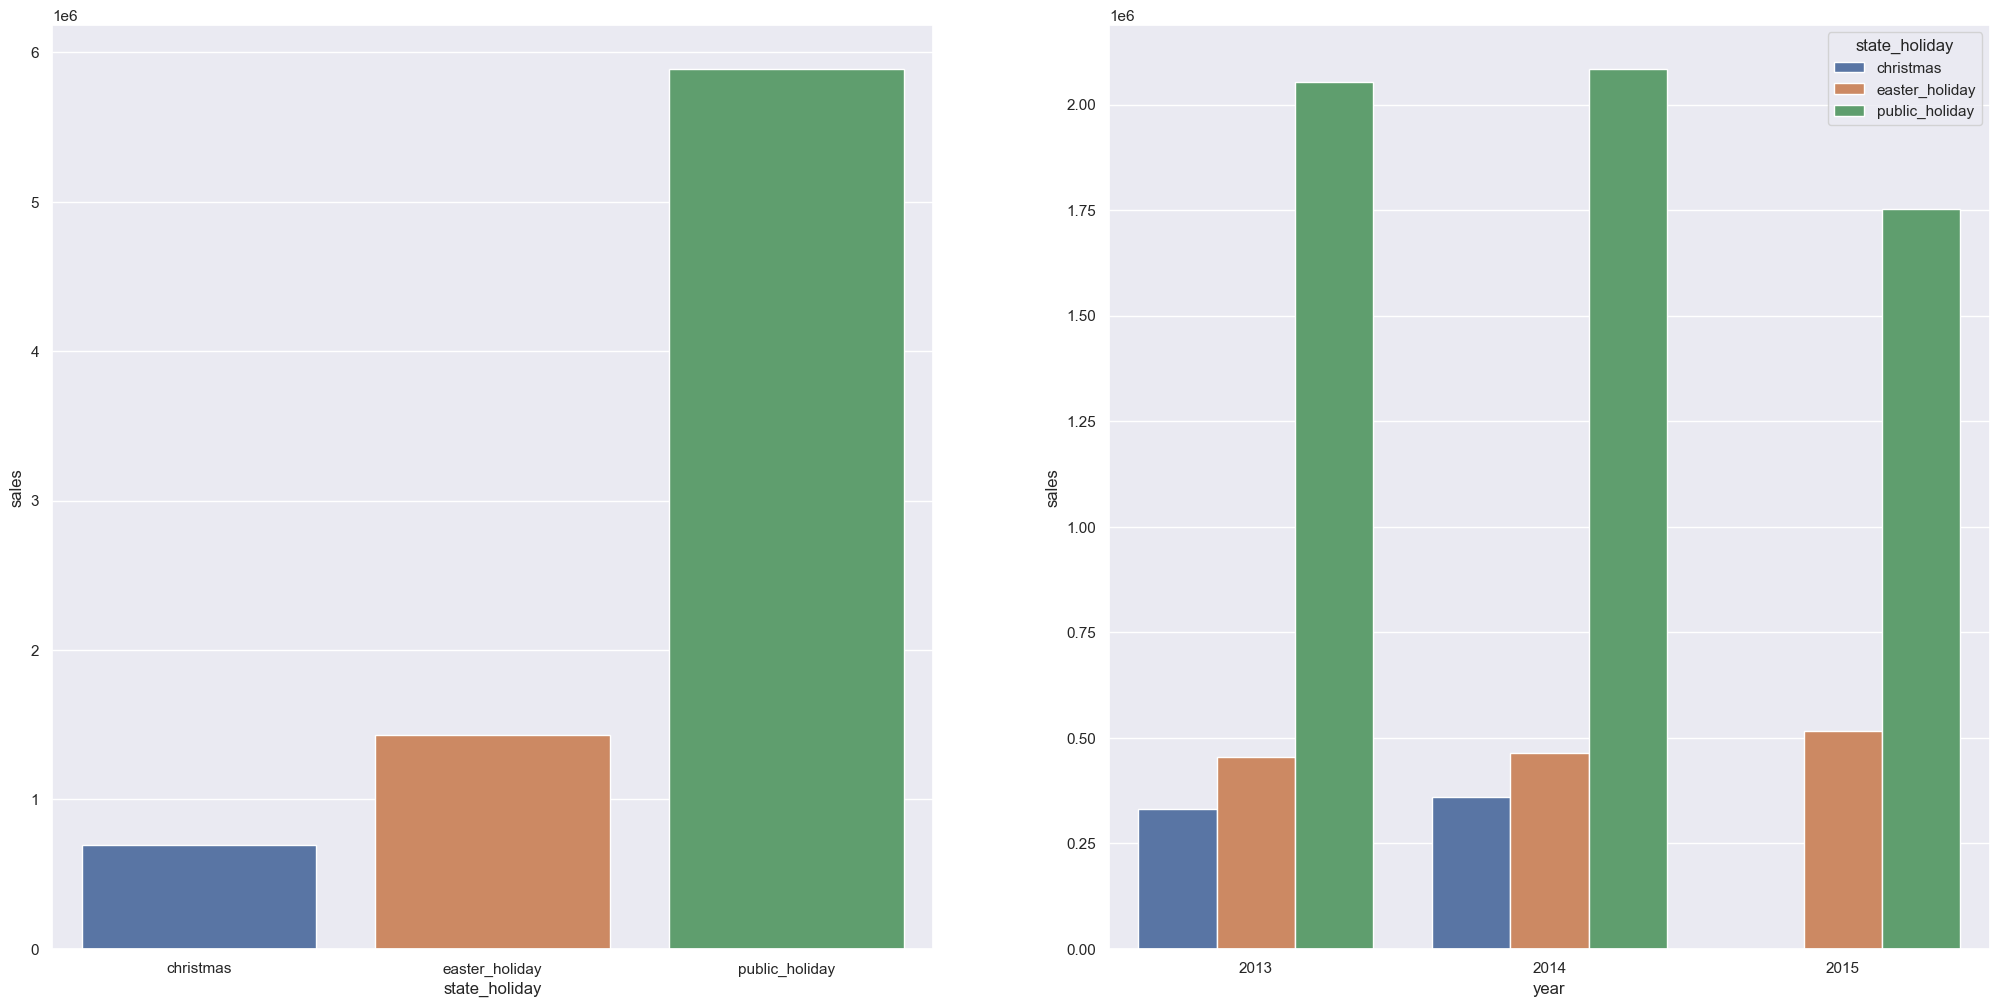

In [53]:
aux = df4[df4['state_holiday'] != 'regular_day']

plt.subplot( 1, 2, 1 )
aux1 = aux[['state_holiday', 'sales']].groupby( 'state_holiday' ).sum().reset_index()
sns.barplot( x='state_holiday', y='sales', data=aux1 );

plt.subplot( 1, 2, 2 )
aux2 = aux[['year', 'state_holiday', 'sales']].groupby( ['year', 'state_holiday'] ).sum().reset_index()
sns.barplot( x='year', y='sales', hue='state_holiday', data=aux2 );

### **H11.** Lojas deveriam vender mais depois do dia 10 de cada mês.
**VERDADEIRA** Lojas vendem mais depois do dia 10 de cada mes.

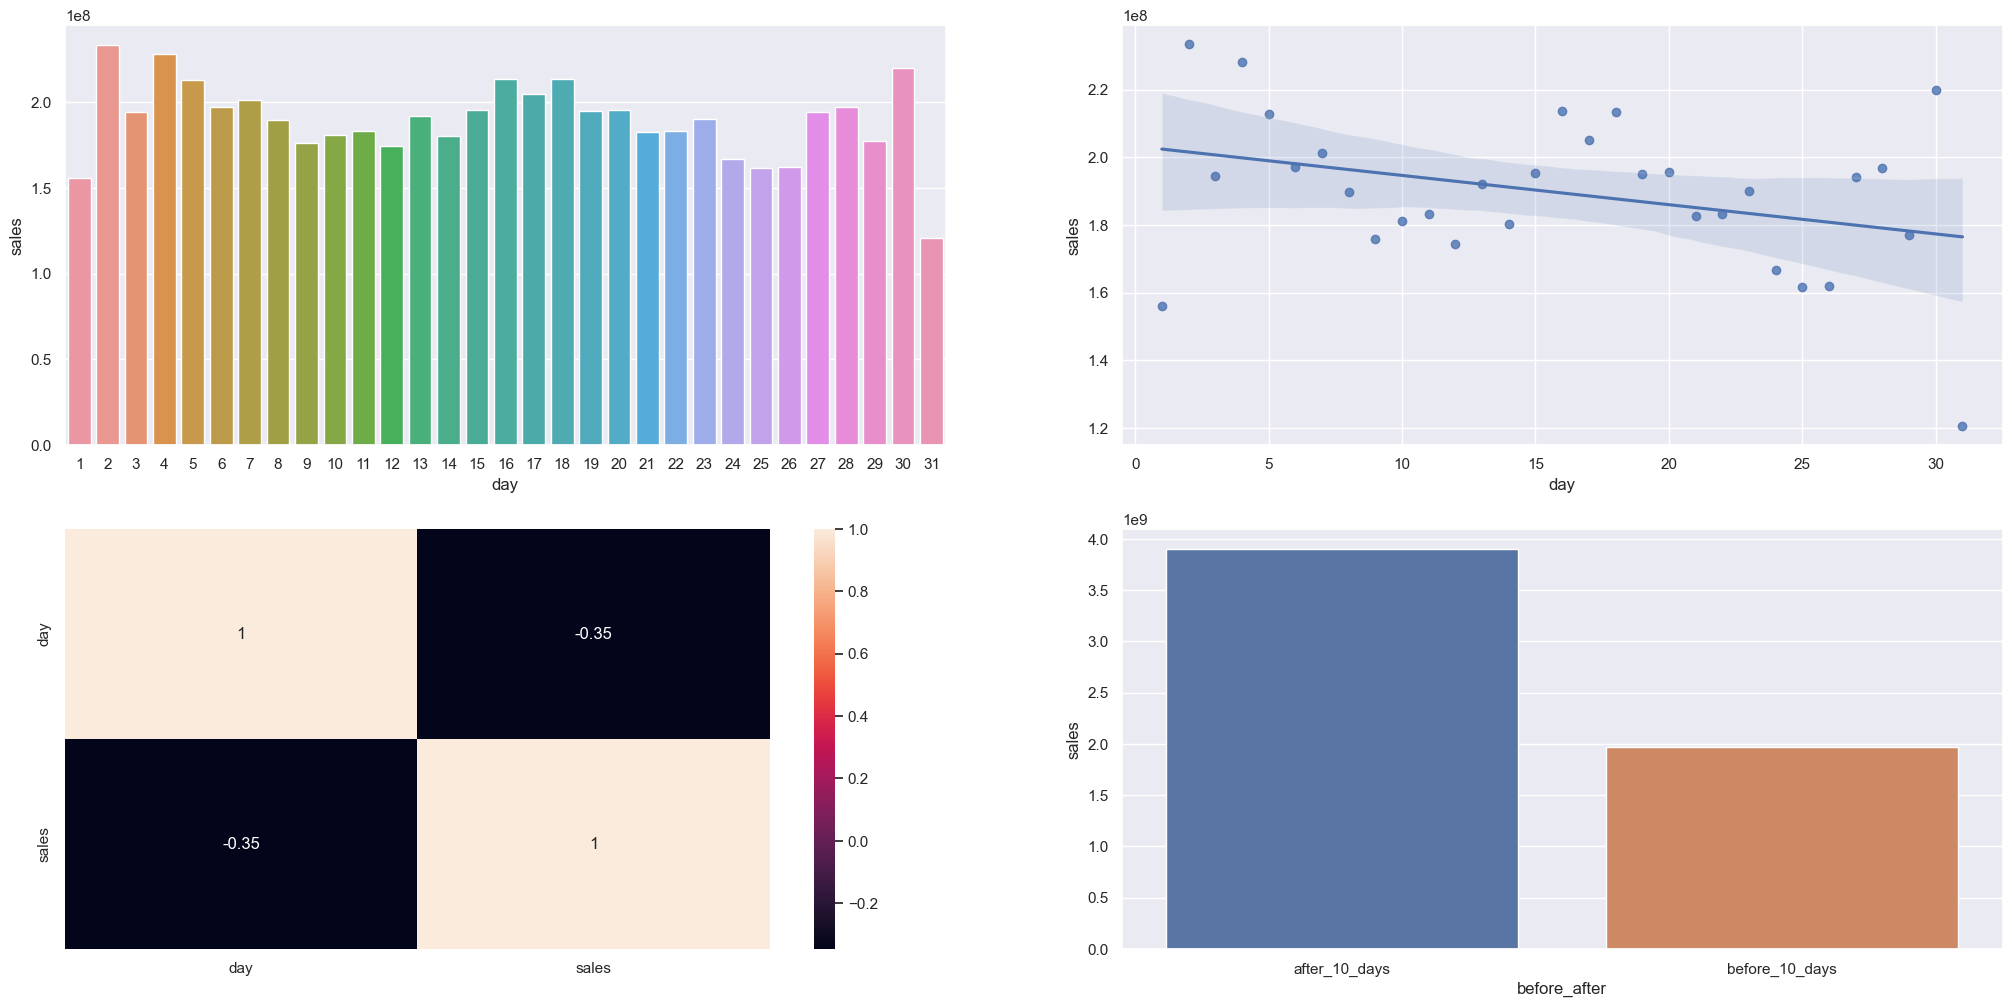

In [56]:
aux1 = df4[['day', 'sales']].groupby( 'day' ).sum().reset_index()

plt.subplot( 2, 2, 1 )
sns.barplot( x='day', y='sales', data=aux1 );

plt.subplot( 2, 2, 2 )
sns.regplot( x='day', y='sales', data=aux1 );

plt.subplot( 2, 2, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days' )
aux2 =aux1[['before_after', 'sales']].groupby( 'before_after' ).sum().reset_index()

plt.subplot( 2, 2, 4 )
sns.barplot( x='before_after', y='sales', data=aux2 );

### Resumo das Hipóteses

In [59]:
tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
      ['H1', 'Falsa', 'Baixa'],  
      ['H2', 'Falsa', 'Media'],  
      ['H3', 'Falsa', 'Media'],
      ['H4', 'Falsa', 'Baixa'],
      ['H5', '-', '-'],
      ['H7', 'Falsa', 'Baixa'],
      ['H8', 'Falsa', 'Media'],
      ['H9', 'Falsa', 'Alta'],
      ['H10', 'Falsa', 'Alta'],
      ['H11', 'Verdadeira', 'Alta'],
      ['H12', 'Verdadeira', 'Alta'],
      ['H13', 'Verdadeira', 'Baixa'],
     ]  
print( tabulate( tab, headers='firstrow' ) )

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H7           Falsa        Baixa
H8           Falsa        Media
H9           Falsa        Alta
H10          Falsa        Alta
H11          Verdadeira   Alta
H12          Verdadeira   Alta
H13          Verdadeira   Baixa


## Análise Multivadiada


### Numerical attributes

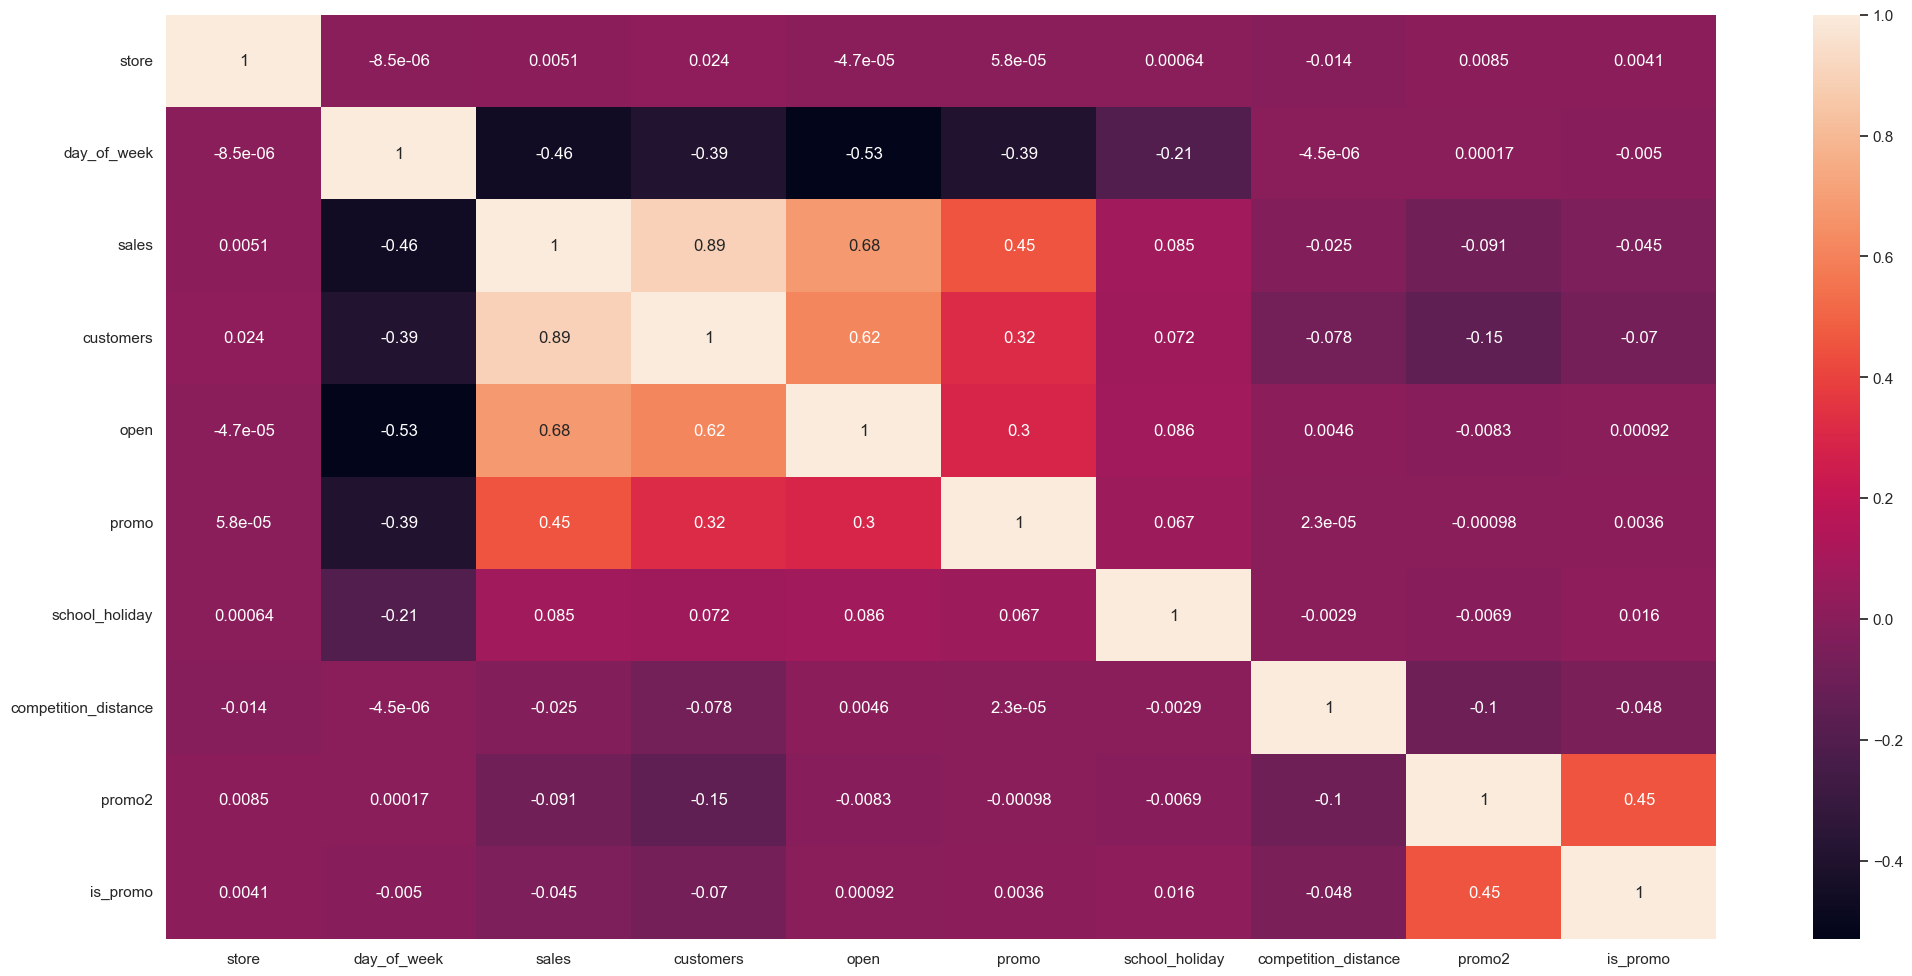

In [60]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

### Categorcal Attributes

Cramer V serve pra fazer análise de atributos não numéricos (se não tem número como fazer a correlação)

<AxesSubplot:>

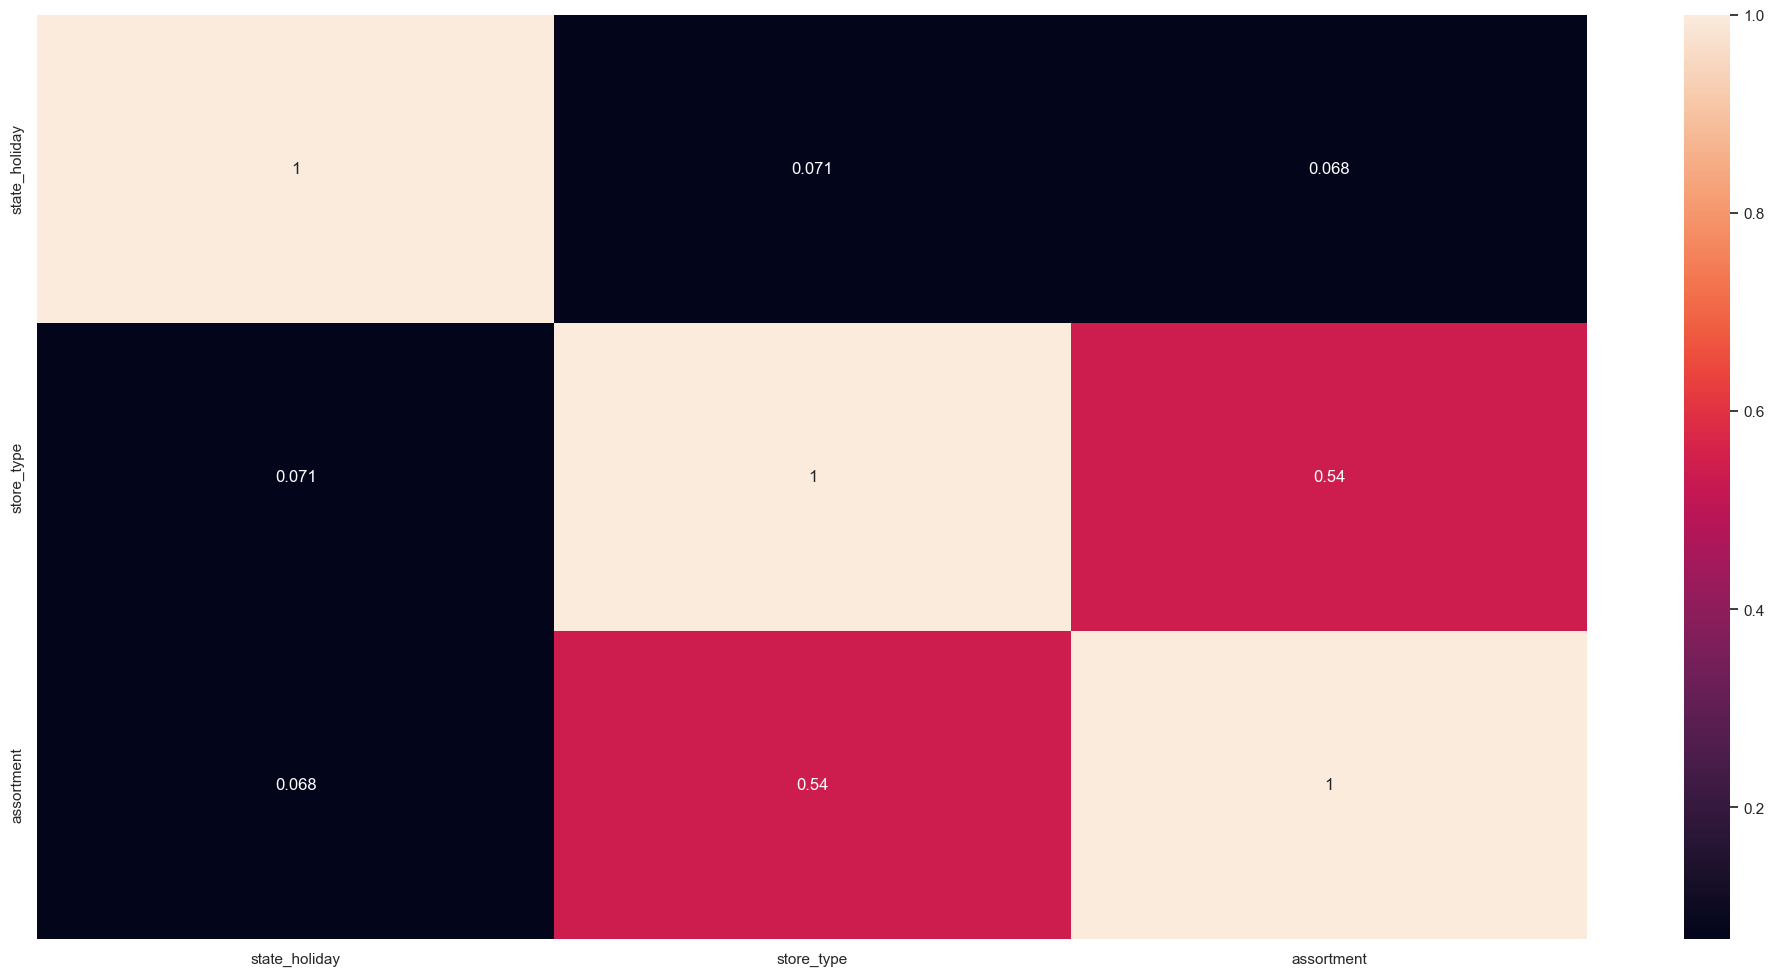

In [61]:
# only categorical data


a = df4.select_dtypes( include='object' )

# Calculate cramer V
a1 = cramer_v( a['state_holiday'], a['state_holiday'] )
a2 = cramer_v( a['state_holiday'], a['store_type'] )
a3 = cramer_v( a['state_holiday'], a['assortment'] )

a4 = cramer_v( a['store_type'], a['state_holiday'] )
a5 = cramer_v( a['store_type'], a['store_type'] )
a6 = cramer_v( a['store_type'], a['assortment'] )

a7 = cramer_v( a['assortment'], a['state_holiday'] )
a8 = cramer_v( a['assortment'], a['store_type'] )
a9 = cramer_v( a['assortment'], a['assortment'] )

# Final dataset
d = pd.DataFrame( {'state_holiday': [a1, a2, a3], 
               'store_type': [a4, a5, a6],
               'assortment': [a7, a8, a9]  })
d = d.set_index( d.columns )

sns.heatmap( d, annot=True )

# Machine Learning

### Compare Model's Performance

In [122]:
modelling_result_cv = pd.concat( [lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv] )
modelling_result_cv

,Model Name,MAE CV,MAPE CV,RMSE CV
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37
0,Lasso,2116.38 +/- 341.5,0.29 +/- 0.01,3057.75 +/- 504.26
0,Random Forest Regressor,836.61 +/- 217.1,0.12 +/- 0.02,1254.3 +/- 316.17
0,XGBoost Regressor,7049.17 +/- 588.63,0.95 +/- 0.0,7715.17 +/- 689.51


### XGBoost Regressor 

- Conjunto de dados utilizado para treino: 80%
- Conjunto de teste: 20%

# <font color ='blue'>  4. Conclusão e Demonstração </font> 

# Tradução e interpretação do erro


### Tradução e interpretação do erro

In [107]:
df92.sort_values( 'MAPE', ascending=False ).head()
# Mape de mais de 50% - trabalhar melhor no próximo ciclo do CRISP
# Criar modelos específicos para lojas mais complexas (?)
# Criar mais variáveis para tentar entender o pq dessa variação(?) 

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
291,292,105002.617188,101701.450105,108303.784270,3301.167082,0.549329
908,909,238473.687500,230889.862241,246057.512759,7583.825259,0.516145
875,876,203528.546875,199503.919221,207553.174529,4024.627654,0.307905
594,595,375512.718750,371358.657319,379666.780181,4154.061431,0.284591
721,722,345628.812500,343836.034061,347421.590939,1792.778439,0.242765


### Business performance

<AxesSubplot:xlabel='store', ylabel='MAPE'>

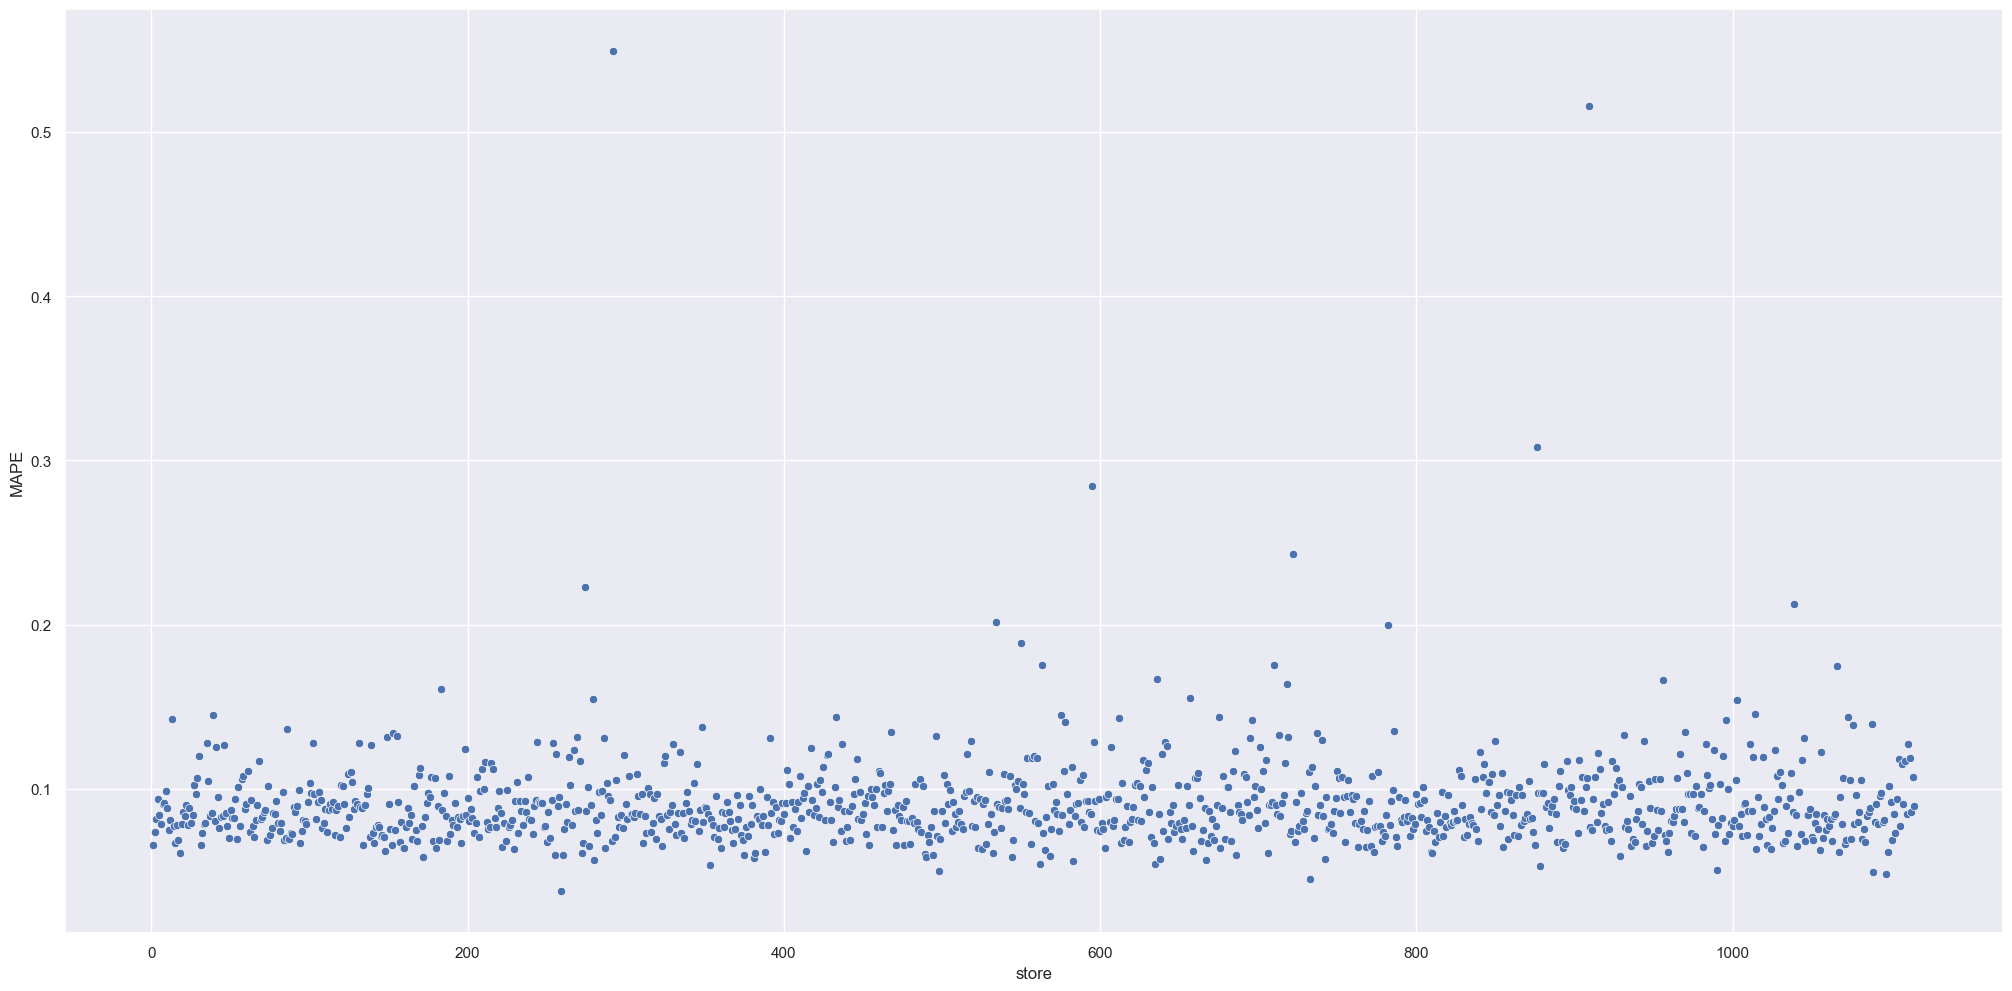

In [108]:
sns.scatterplot( x='store', y='MAPE', data=df92 )
# Plota para cada loja um ponto e a altura é o MAPE

### Total performance

In [109]:
df93 = df92[['predictions', 'worst_scenario', 'best_scenario']].apply( lambda x: np.sum( x ), axis=0 ).reset_index().rename( columns={'index': 'Scenario', 0:'Values'} )
# Lambda para formatar o valor
df93['Values'] = df93['Values'].map( 'R${:,.2f}'.format )
df93

,Scenario,Values
0,predictions,"R$283,057,088.00"
1,worst_scenario,"R$282,357,846.37"
2,best_scenario,"R$283,756,309.22"


### Machine Learning performance

In [110]:
df9['error'] = df9['sales'] - df9['predictions']
df9['error_rate'] = df9['predictions'] / df9['sales']

<AxesSubplot:xlabel='predictions', ylabel='error'>

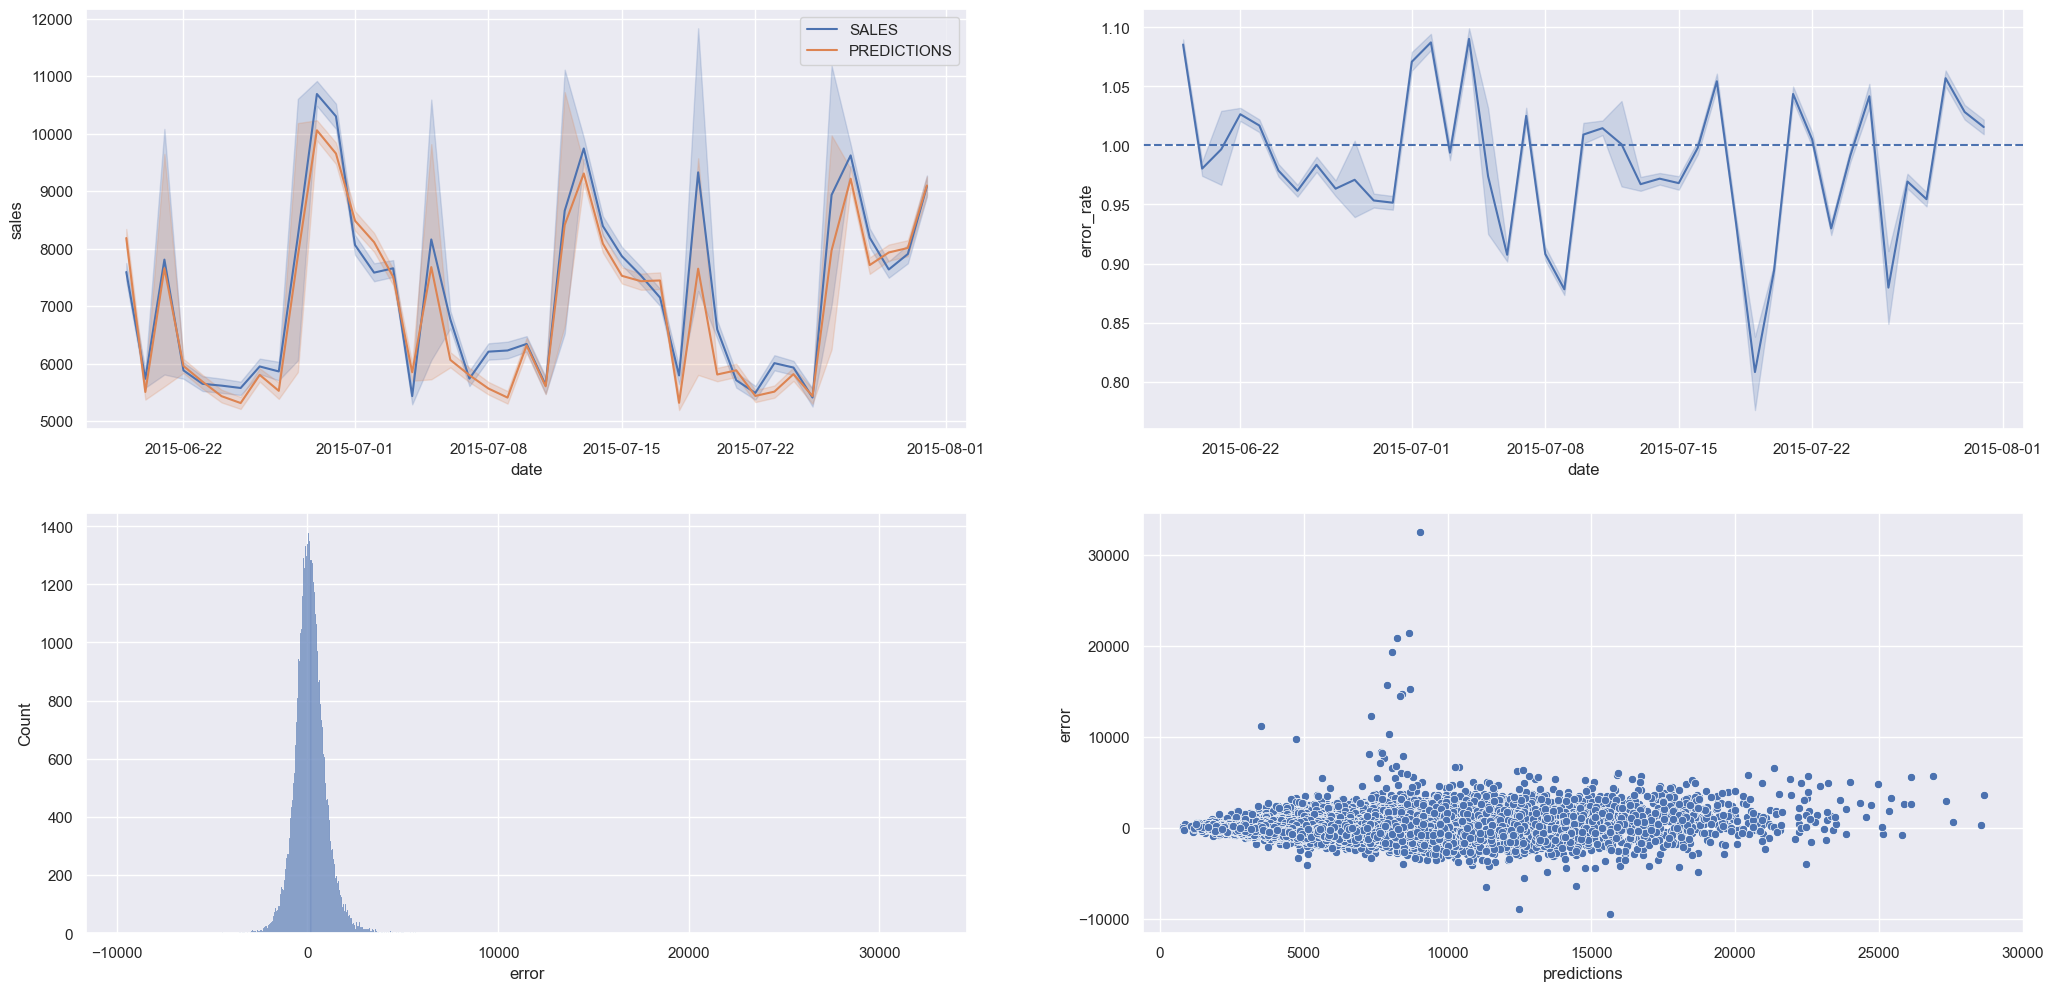

In [111]:
plt.subplot( 2, 2, 1 )
# Vendas por dia
sns.lineplot( x='date', y='sales', data=df9, label='SALES' )
# Predição por dia
sns.lineplot( x='date', y='predictions', data=df9, label='PREDICTIONS' )
# Laranj: Predição. Azul: venda real. Sombra variância


plt.subplot( 2, 2, 2 )
# Taxa de erro por dia
sns.lineplot( x='date', y='error_rate', data=df9 )
# Se a variação for >1: superestimação, <1: subestimação
plt.axhline( 1, linestyle='--')


plt.subplot( 2, 2, 3 )
# Se o erro tem uma distribuição normal - Se for gausseana = normal = bom
sns.histplot( df9['error'] )
# Se usa em análise de resíduo


plt.subplot( 2, 2, 4 )
# Forma de monitorar como ta a predição e as vendas ao longo do tempo
sns.scatterplot( x='predictions', y='error', data=df9)
# Sempre que a análise esta entre 8~10K tem erros maiores. 
# Análise de resíduo. Os erros tem que ficar dentro de um 'tubo', quanto menos pontos par fora melhor

# Análise de resíduo: 
# Tem como objetivo mostrar quais são os pontos fracos do seu modelo e o que vc precisa fazer para melhor a acu consertando os pontos.

# <font color ='blue'>  5. Próximos passos </font> 


• Workshop do Modelo para os Business Users
• Coletar Feedbacks sobre a Usabilidade
• Aumentar em 10% a Acurácia do Modelo

# <font color ='blue'>  Q & A  </font> 


# <font color ='blue'>  Muito Obrigada!  </font> 
